# Developing a Sentiment Classifier Using the Tweet Sentiment Extraction Dataset

**Objective:**
The goal of this project is to analyze the Tweet Sentiment Extraction dataset, transform the text data using the Bag-of-Words (BoW) technique, and build a sentiment classifier. The project will involve text preprocessing with Python's nltk library and the construction of a decision tree-based classifier using DecisionTreeClassifier.

**Steps:**
*   Data Analysis: Explore and analyze the dataset to understand the distribution of sentiments (e.g., positive, negative, neutral).
*   Text Preprocessing: Use nltk for tokenization, stop-word removal, and text normalization.
*   Vectorization: Apply the Bag-of-Words model to convert text into numerical features.
*   Model Building: Train a Decision Tree classifier on the vectorized data and evaluate its performance using appropriate metrics.


**Dataset:**
https://www.kaggle.com/competitions/tweet-sentiment-extraction/data?select=train.csv

In [1]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    pass

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweet_sentiment_train.csv.zip')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [6]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [7]:
df.isna().sum()

,0
textID,0
text,1
selected_text,1
sentiment,0


The DataFrame contains 27,481 records with four columns, all of which are of object type. There is only one missing value present across two columns.

In [8]:
df[df['text'].isna()]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

,0
textID,0
text,0
selected_text,0
sentiment,0


In [11]:
df['sentiment'].value_counts(normalize = True)*100

,proportion
sentiment,
neutral,40.454876
positive,31.229985
negative,28.315138


There is a slight imbalance in the distribution of labels.

In [12]:
df[df['sentiment']=='neutral'].head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
10,2339a9b08b,"as much as i love to be hopeful, i reckon the...","as much as i love to be hopeful, i reckon the ...",neutral
14,bbe3cbf620,test test from the LG enV2,test test from the LG enV2,neutral
19,40e7becabf,Hes just not that into you,Hes just not that into you,neutral
20,04d17ef61e,"oh Marly, I`m so sorry!! I hope you find her...","oh Marly, I`m so sorry!! I hope you find her ...",neutral
22,7de057cf40,is cleaning the house for her family who is co...,is cleaning the house for her family who is co...,neutral
23,9ce5570064,gotta restart my computer .. I thought Win7 wa...,gotta restart my computer .. I thought Win7 wa...,neutral


In [13]:
df[df['sentiment']=='positive'].head(10)

,textID,text,selected_text,sentiment
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive
11,16fab9f95b,I really really like the song Love Story by Ta...,like,positive
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,interesting.,positive
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...","the free fillin` app on my ipod is fun, im add...",positive
28,6ce4a4954b,juss came backk from Berkeleyy ; omg its madd ...,fun,positive
30,d33f811375,I`m going home now. Have you seen my new twitt...,Quite....heavenly,positive
31,7d8c4c11e4,i hope unni will make the audition . fighting ...,hope,positive
33,2dc51711bc,That`s very funny. Cute kids.,funny.,positive
39,2863f435bd,A little happy for the wine jeje ok it`sm my f...,A little happy fo,positive


In [14]:
df[df['sentiment']=='negative'].head(10)

,textID,text,selected_text,sentiment
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,DANGERously,negative
13,04dd1d2e34,i want to go to music tonight but i lost my vo...,lost,negative
15,8a939bfb59,"Uh oh, I am sunburned","Uh oh, I am sunburned",negative
16,3440297f8b,"S`ok, trying to plot alternatives as we speak...",*sigh*,negative
17,919fa93391,i`ve been sick for the past few days and thus...,sick,negative
18,af3fed7fc3,is back home now gonna miss every one,onna,negative


In [15]:
df['texts_lenght'] = df['text'].str.len()

In [16]:
df.head(10)

,textID,text,selected_text,sentiment,texts_lenght
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46
2,088c60f138,my boss is bullying me...,bullying me,negative,25
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,92
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,64
7,50e14c0bb8,Soooo high,Soooo high,neutral,10
8,e050245fbd,Both of you,Both of you,neutral,12
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,69


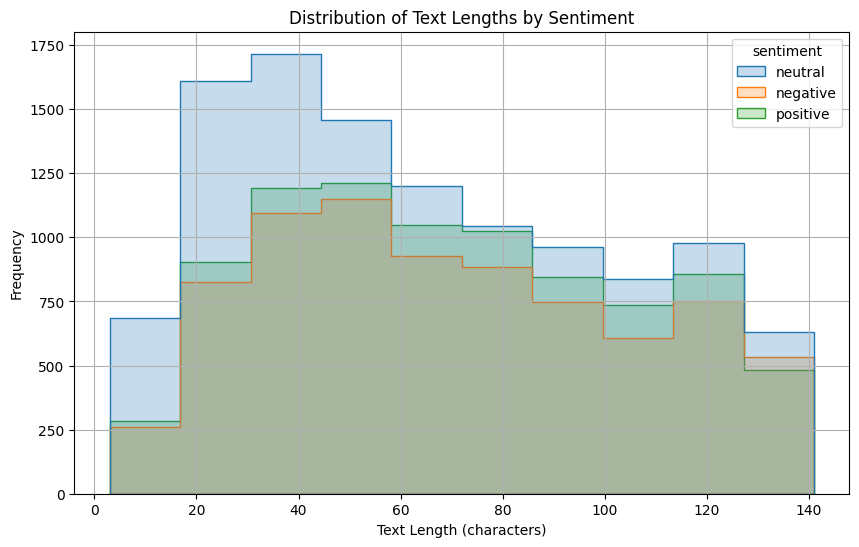

In [17]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='texts_lenght', hue='sentiment', bins=10, element='step')

plt.title('Distribution of Text Lengths by Sentiment')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Most texts range in length from 20 to 60 characters. The distribution appears approximately lognormal for each individual label.

### Preprocessing and Vectorization



In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
english_stopwords = stopwords.words('english')

In [21]:
stemmer = SnowballStemmer(language='english')

In [22]:
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]

In [23]:
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=1000)

In [24]:
vectorizer.fit(df['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7c402b340f70>)

In [25]:
inputs = vectorizer.transform(df.text)

### Building a classifier



In [26]:
X_train_bow, X_test_bow, y_train, y_test = train_test_split(inputs, df.sentiment,
                                                                        test_size=0.3, random_state=42)

In [27]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_bow, y_train)
train_preds = model.predict(X_train_bow)
test_preds = model.predict(X_test_bow)
cm = confusion_matrix(y_test, test_preds)


In [28]:
cm

array([[1383,  702,  271],
       [ 785, 1946,  612],
       [ 293,  523, 1729]])

The confusion matrix indicates some misclassification across all classes. Class 3 has relatively stronger performance than Class 1 or 2.

In [29]:
f1_score(y_test, test_preds, average=None)

array([0.57421632, 0.59748235, 0.67054489])

In summary, while the classifier shows reasonable performance, especially for Class 3, the overall results indicate that there is notable misclassification. Enhancing feature extraction, model tuning, or considering a different algorithm might improve the classification scores.

### Analysis of the impact of words on the classifier's performance


In [30]:
importance_df = pd.DataFrame({
    'feature': vectorizer.get_feature_names_out(),
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [31]:
importance_df.head(10)

,feature,importance
422,happi,0.025877
547,love,0.025062
859,thank,0.023369
397,good,0.018809
50,`,0.016576
586,miss,0.015861
741,sad,0.015065
0,!,0.013394
10,",",0.013156
404,great,0.012735


These words appear relevant for determining the emotional tone of the message. However, it is unusual to see punctuation marks, aside from the exclamation mark, among the top ten most significant features.